In [1]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

import pandas as pd
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize          

#Customize the vectorizer to do lemmatization using NLTK WordNetLemmatizer
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]
    
df= pd.read_csv('3000Data.csv', delimiter=',', header=None, encoding='ISO-8859-1')
#print(df)

#Count of Medical History Patients

print('Number of Medical History 1 cases:', df[df[8] == 1][0].count())
print('Number of Non-Medical History 1 cases:', df[df[8] == 0][0].count())
print('Number of Medical History 2 cases:', df[df[9] == 1][0].count())
print('Number of Non-Medical History 2 cases:', df[df[9] == 0][0].count())
print('Number of Medical History 3 cases:', df[df[10] == 1][0].count())
print('Number of Non-Medical History 3 cases:', df[df[10] == 0][0].count())
print('Number of Medical History 4 cases:', df[df[11] == 1][0].count())
print('Number of Non-Medical History 4 cases:', df[df[11] == 0][0].count())
print('Number of Medical History 5 cases:', df[df[12] == 1][0].count())
print('Number of Non-Medical History 5 cases:', df[df[12] == 0][0].count())
print('Number of Medical History 6 cases:', df[df[13] == 1][0].count())
print('Number of Non-Medical History 6 cases:', df[df[13] == 0][0].count())
print('Number of Medical History 7 cases:', df[df[14] == 1][0].count())
print('Number of Non-Medical History 7 cases:', df[df[14] == 0][0].count())


#Count of Preop Medication Patients
print('Number of Preop Medication 1 cases:', df[df[15] == 1][0].count())
print('Number of Non-Preop Medication 1 cases:', df[df[15] == 0][0].count())
print('Number of Preop Medication 2 cases:', df[df[16] == 1][0].count())
print('Number of Non-Preop Medication 2 cases:', df[df[16] == 0][0].count())
print('Number of Preop Medication 3 cases:', df[df[17] == 1][0].count())
print('Number of Non-Preop Medication 3 cases:', df[df[17] == 0][0].count())
print('Number of Preop Medication 4 cases:', df[df[18] == 1][0].count())
print('Number of Non-Preop Medication 4 cases:', df[df[18] == 0][0].count())
print('Number of Preop Medication 5 cases:', df[df[19] == 1][0].count())
print('Number of Non-Preop Medication 5 cases:', df[df[19] == 0][0].count())
print('Number of Preop Medication 6 cases:', df[df[20] == 1][0].count())
print('Number of Non-Preop Medication 6 cases:', df[df[20] == 0][0].count())


#Count of Symptoms
print('Number of Symptom 1 cases:', df[df[21] == 1][0].count())
print('Number of Non-Symptom 1 cases:', df[df[21] == 0][0].count())
print('Number of Symptom 2 cases:', df[df[22] == 1][0].count())
print('Number of Non-Symptom 2 cases:', df[df[22] == 0][0].count())
print('Number of Symptom 3 cases:', df[df[23] == 1][0].count())
print('Number of Non-Symptom 3 cases:', df[df[23] == 0][0].count())
print('Number of Symptom 4 cases:', df[df[24] == 1][0].count())
print('Number of Non-Symptom 4 cases:', df[df[24] == 0][0].count())
print('Number of Symptom 5 cases:', df[df[25] == 1][0].count())
print('Number of Non-Symptom 5 cases:', df[df[25] == 0][0].count())


Number of Medical History 1 cases: 513
Number of Non-Medical History 1 cases: 2487
Number of Medical History 2 cases: 883
Number of Non-Medical History 2 cases: 2117
Number of Medical History 3 cases: 406
Number of Non-Medical History 3 cases: 2594
Number of Medical History 4 cases: 161
Number of Non-Medical History 4 cases: 2839
Number of Medical History 5 cases: 173
Number of Non-Medical History 5 cases: 2827
Number of Medical History 6 cases: 764
Number of Non-Medical History 6 cases: 2236
Number of Medical History 7 cases: 767
Number of Non-Medical History 7 cases: 2233
Number of Preop Medication 1 cases: 1506
Number of Non-Preop Medication 1 cases: 1494
Number of Preop Medication 2 cases: 1773
Number of Non-Preop Medication 2 cases: 1227
Number of Preop Medication 3 cases: 2471
Number of Non-Preop Medication 3 cases: 529
Number of Preop Medication 4 cases: 1567
Number of Non-Preop Medication 4 cases: 1433
Number of Preop Medication 5 cases: 2465
Number of Non-Preop Medication 5 ca

In [2]:
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,00225710a878eff524a1d13be817e8e2,Chinese,Female,Singaporean,1/16/1983,5190.566695,4/10/2014,4/22/2014,0,0,...,0,0,1,0,0,13.4,27.9,96,66.9,155
1,0029d90eb654699c18001c17efb0f129,Chinese,Female,Singaporean,10/14/1943,22601.497870,11/7/2012,11/20/2012,0,1,...,0,1,0,0,1,16.7,26.5,109,89.1,160
2,0040333abd68527ecb53e1db9073f52e,Indian,Male,Singaporean,8/26/1972,17447.181630,1/19/2013,1/31/2013,0,1,...,0,1,0,0,1,14.8,25.2,96,79.5,172
3,00473b58e3dc8ae37b3cb34069705083,Chinese,Female,Singapore citizen,7/23/1976,15285.883220,2/10/2014,2/15/2014,1,0,...,0,1,1,1,0,14.9,28.7,122,81.1,160
4,0078662d1d983dde68ea057c42d5b5cf,Malay,Male,Foreigner,10/19/1942,73477.869010,4/28/2012,5/10/2012,0,1,...,0,1,0,1,1,14.2,27.2,89,74.7,173
5,0088bbd94c90bbc9158e13465441ebb6,Others,Female,Foreigner,10/22/1960,26051.592260,11/5/2015,11/15/2015,0,1,...,1,1,1,0,0,13.0,25.8,102,61.1,160
6,0092d20dd0719e88ecfdd02d5e7ca7b7,Malay,Male,Singaporean,9/18/1947,21498.986760,1/20/2013,1/31/2013,0,0,...,1,1,1,0,0,14.3,24.7,123,70.9,172
7,01081b8bcb0f9e27b888d23bb35a50dd,Chinese,Female,Singaporean,4/12/1948,27512.273960,2/2/2011,2/12/2011,0,0,...,1,1,1,1,1,13.2,32.2,70,79.3,162
8,010cf28233f50d3857b499a9c208c610,Malay,Male,Singaporean,5/28/1973,25612.364150,2/3/2011,2/11/2011,0,0,...,1,1,0,0,1,13.6,30.6,102,68.7,165
9,0116c5d9b6c2c2e8758c75e6da86014b,Chinese,Female,Singaporean,12/15/1990,15790.597740,9/1/2012,9/10/2012,1,0,...,1,0,0,1,1,15.1,27.3,112,84.6,154


In [3]:
input = open('id.txt', 'r')
text = input.read()
wordlist = text.split()
wordfreq = [wordlist.count(p) for p in wordlist]
dictionary = dict(zip(wordlist, wordfreq))

aux = [(dictionary[key], key) for key in dictionary]
aux.sort()

#aux.reverse()
for a in aux: 
    print (a)

(1, '00225710a878eff524a1d13be817e8e2')
(1, '0029d90eb654699c18001c17efb0f129')
(1, '0040333abd68527ecb53e1db9073f52e')
(1, '00473b58e3dc8ae37b3cb34069705083')
(1, '0078662d1d983dde68ea057c42d5b5cf')
(1, '0088bbd94c90bbc9158e13465441ebb6')
(1, '0092d20dd0719e88ecfdd02d5e7ca7b7')
(1, '01081b8bcb0f9e27b888d23bb35a50dd')
(1, '010cf28233f50d3857b499a9c208c610')
(1, '0116c5d9b6c2c2e8758c75e6da86014b')
(1, '011f6ed96aa8a4047a7dc66219db4cd7')
(1, '01552a3f5a9c868e6e2b2c15553dbd4a')
(1, '015e6ca145eb3aa52dd68440e98c9ea9')
(1, '016081ba470f290f4a3ea7e1484a1c13')
(1, '0175090ddd9e763eb4ba0c7082a3cd7b')
(1, '0179a0c493df7124720e1d501c40d2d0')
(1, '01ad0c392cc969cf3f4d74d998219a11')
(1, '01b158024e4954c551e0710680ce6b15')
(1, '01d0c142bbd90f0f60435c76ea2a1e73')
(1, '01d919d33166648ab24977d242f147c4')
(1, '0211593272c53dc0034e183600ea185f')
(1, '021bc85123058752e7cd8454bac7594f')
(1, '0230b3529ddf67d50794447d01892cf9')
(1, '02375302a1be7da03f29194f24d11366')
(1, '025af6c3b578fde9cb93846662d02e0d')


In [7]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plot

df1 = pd.read_csv("3000_Dataset.csv")
df1


,id,Race,Gender,resident_status,date_of_birth,Total_Amt,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,00225710a878eff524a1d13be817e8e2,Chinese,Female,Singaporean,1/16/1983,5190.566695,4/10/2014,4/22/2014,0,0,...,0,0,1,0,0,13.4,27.9,96,66.9,155
1,0029d90eb654699c18001c17efb0f129,Chinese,Female,Singaporean,10/14/1943,22601.497870,11/7/2012,11/20/2012,0,1,...,0,1,0,0,1,16.7,26.5,109,89.1,160
2,0040333abd68527ecb53e1db9073f52e,Indian,Male,Singaporean,8/26/1972,17447.181630,1/19/2013,1/31/2013,0,1,...,0,1,0,0,1,14.8,25.2,96,79.5,172
3,00473b58e3dc8ae37b3cb34069705083,Chinese,Female,Singapore citizen,7/23/1976,15285.883220,2/10/2014,2/15/2014,1,0,...,0,1,1,1,0,14.9,28.7,122,81.1,160
4,0078662d1d983dde68ea057c42d5b5cf,Malay,Male,Foreigner,10/19/1942,73477.869010,4/28/2012,5/10/2012,0,1,...,0,1,0,1,1,14.2,27.2,89,74.7,173
5,0088bbd94c90bbc9158e13465441ebb6,Others,Female,Foreigner,10/22/1960,26051.592260,11/5/2015,11/15/2015,0,1,...,1,1,1,0,0,13.0,25.8,102,61.1,160
6,0092d20dd0719e88ecfdd02d5e7ca7b7,Malay,Male,Singaporean,9/18/1947,21498.986760,1/20/2013,1/31/2013,0,0,...,1,1,1,0,0,14.3,24.7,123,70.9,172
7,01081b8bcb0f9e27b888d23bb35a50dd,Chinese,Female,Singaporean,4/12/1948,27512.273960,2/2/2011,2/12/2011,0,0,...,1,1,1,1,1,13.2,32.2,70,79.3,162
8,010cf28233f50d3857b499a9c208c610,Malay,Male,Singaporean,5/28/1973,25612.364150,2/3/2011,2/11/2011,0,0,...,1,1,0,0,1,13.6,30.6,102,68.7,165
9,0116c5d9b6c2c2e8758c75e6da86014b,Chinese,Female,Singaporean,12/15/1990,15790.597740,9/1/2012,9/10/2012,1,0,...,1,0,0,1,1,15.1,27.3,112,84.6,154


In [8]:
df2 = df1.groupby('Race')['id'].nunique()
df2

Race
Chinese    1915
Indian      295
Malay       629
Others      161
Name: id, dtype: int64

In [9]:
df3 = df1.groupby('Gender')['id'].nunique()
df3

Gender
Female    1497
Male      1503
Name: id, dtype: int64

In [10]:
df4 = df1.groupby('resident_status')['id'].nunique()
df4

resident_status
Foreigner             143
PR                    465
Singapore citizen     610
Singaporean          1782
Name: id, dtype: int64

In [14]:
doa= df1.groupby(['id', 'date_of_admission']).size()
doa

id                                date_of_admission
00225710a878eff524a1d13be817e8e2  4/10/2014            1
0029d90eb654699c18001c17efb0f129  11/7/2012            1
0040333abd68527ecb53e1db9073f52e  1/19/2013            1
00473b58e3dc8ae37b3cb34069705083  2/10/2014            1
0078662d1d983dde68ea057c42d5b5cf  4/28/2012            1
0088bbd94c90bbc9158e13465441ebb6  11/5/2015            1
0092d20dd0719e88ecfdd02d5e7ca7b7  1/20/2013            1
01081b8bcb0f9e27b888d23bb35a50dd  2/2/2011             1
010cf28233f50d3857b499a9c208c610  2/3/2011             1
0116c5d9b6c2c2e8758c75e6da86014b  9/1/2012             1
011f6ed96aa8a4047a7dc66219db4cd7  6/24/2014            1
012c5eb5397a72f8aeb64f942b60846d  11/17/2015           1
01552a3f5a9c868e6e2b2c15553dbd4a  6/15/2012            1
015e6ca145eb3aa52dd68440e98c9ea9  10/3/2012            1
016081ba470f290f4a3ea7e1484a1c13  11/19/2015           1
0175090ddd9e763eb4ba0c7082a3cd7b  5/21/2014            1
0179a0c493df7124720e1d501c40d2d0  2/

In [15]:
df5 = df1.groupby('resident_status').mean()
df5

,Total_Amt,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
resident_status,,,,,,,,,,,,,,,,,,,,,
Foreigner,41638.719248,0.174825,0.321678,0.083916,0.041958,0.062937,0.237762,0.300699,0.454545,0.552448,...,0.594406,0.699301,0.489510,0.720280,0.538462,14.307692,27.604895,101.230769,79.441958,165.629371
PR,24380.623391,0.165591,0.273118,0.137634,0.049462,0.073118,0.279570,0.288172,0.492473,0.572043,...,0.600000,0.670968,0.567742,0.718280,0.522581,14.449462,27.466237,98.335484,79.244301,165.518280
Singapore citizen,19767.966073,0.172131,0.321311,0.142623,0.057377,0.055738,0.277049,0.218033,0.485246,0.573770,...,0.634426,0.632787,0.539344,0.742623,0.500000,14.498525,27.366721,99.831148,78.523279,164.849180
Singaporean,20368.925581,0.171717,0.288440,0.136364,0.054433,0.053872,0.241863,0.256453,0.514029,0.604938,...,0.623457,0.666667,0.546016,0.718294,0.536476,14.472896,27.429405,99.443322,78.720875,165.078563


In [16]:
df6 = df1.groupby('Race').mean()
df6

,Total_Amt,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
Race,,,,,,,,,,,,,,,,,,,,,
Chinese,19078.975062,0.170757,0.288773,0.129504,0.053786,0.061097,0.254308,0.259530,0.509661,0.578068,...,0.621932,0.655875,0.547781,0.722715,0.518538,14.457702,27.362715,98.964491,78.977389,165.283551
Indian,24060.131283,0.155932,0.318644,0.149153,0.067797,0.044068,0.277966,0.271186,0.498305,0.637288,...,0.589831,0.691525,0.586441,0.691525,0.593220,14.537966,27.624068,101.054237,78.925424,164.918644
Malay,29469.598819,0.171701,0.297297,0.152623,0.052464,0.057234,0.251192,0.235294,0.483307,0.602544,...,0.615262,0.664547,0.537361,0.736089,0.524642,14.463593,27.474722,99.515103,78.769634,164.861685
Others,21595.390006,0.198758,0.304348,0.111801,0.031056,0.043478,0.229814,0.260870,0.490683,0.614907,...,0.683230,0.670807,0.472050,0.739130,0.515528,14.453416,27.713665,101.763975,76.508075,164.670807


In [17]:
df6 = df1.groupby('Race')['Total_Amt'].mean()
df6


Race
Chinese    19078.975062
Indian     24060.131283
Malay      29469.598819
Others     21595.390006
Name: Total_Amt, dtype: float64

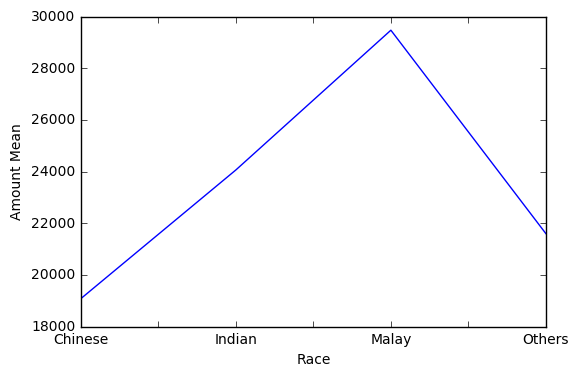

In [20]:
%matplotlib inline
plot.figure();df6.plot()
plot.ylabel('Amount Mean')


In [23]:
df7 = df1.groupby('resident_status')['Total_Amt'].mean()
df7

resident_status
Foreigner            41638.719248
PR                   24380.623391
Singapore citizen    19767.966073
Singaporean          20368.925581
Name: Total_Amt, dtype: float64

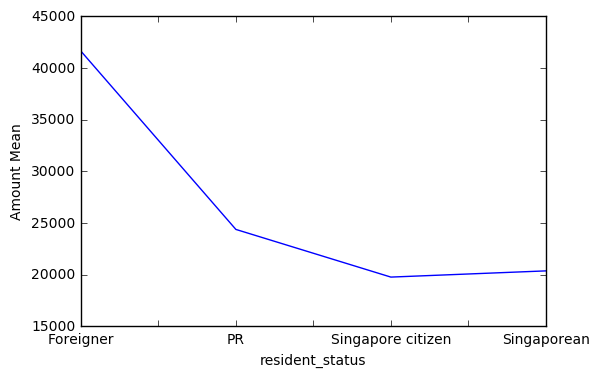

In [24]:
%matplotlib inline
plot.figure();df7.plot()
plot.ylabel('Amount Mean')


In [28]:
df8 = df1.groupby('Gender')['lab_result_1'].mean()
df8

Gender
Female    14.502271
Male      14.431071
Name: lab_result_1, dtype: float64

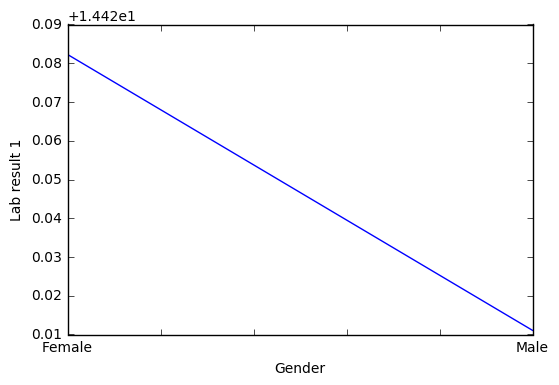

In [30]:
%matplotlib inline
plot.figure();df8.plot()
plot.ylabel('Lab result 1')

In [31]:
df9 = df1.groupby('Gender')['lab_result_2'].mean()
df9

Gender
Female    27.436673
Male      27.424817
Name: lab_result_2, dtype: float64

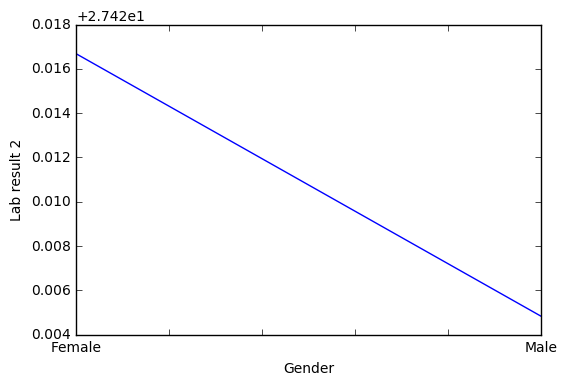

In [32]:
%matplotlib inline
plot.figure();df9.plot()
plot.ylabel('Lab result 2')

In [33]:
df10 = df1.groupby('Gender')['lab_result_3'].mean()
df10

Gender
Female    99.517034
Male      99.354624
Name: lab_result_3, dtype: float64

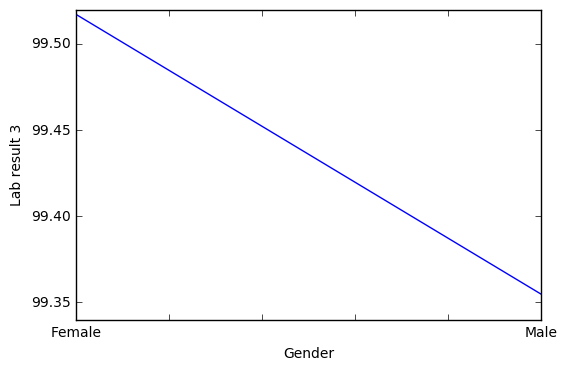

In [35]:
%matplotlib inline
plot.figure();df10.plot()
plot.ylabel('Lab result 3')

In [38]:
import pandas

file =  pandas.read_csv("3000_Dataset.csv")

# importing logistic Regression from sklearn kit
from sklearn import  cross_validation
from  sklearn import linear_model
from sklearn.linear_model import  LogisticRegression

# algorithm instantiation
algorithm = LogisticRegression(random_state=1)
Predictors = ["lab_result_1", "lab_result_2","lab_result_3"]
#Predicting values using 10 fold cross validation for train and test
Predicted = cross_validation.cross_val_predict(algorithm,file[Predictors],file["lab_result_3"],cv=10)
score = cross_validation.cross_val_score(algorithm,file[Predictors],file["lab_result_3"],cv=10)
file2 = pandas.DataFrame({"Lab1": file["lab_result_1"],"Lab2" : file["lab_result_2"],"Lab3" : file["lab_result_3"]})
# Generation of Predicted values
file2.to_csv("Predictedfile", index=False)
print (score.mean())

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


0.0603240732478


In [43]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score

pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression())
])
parameters = {
    'vect__max_df': (0.25, 0.5, 0.75),
    #'vect__stop_words': ('english', None),
    'vect__max_features': (200, 300, 500, None),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'vect__use_idf': (True, False),
    'vect__norm': ('l1', 'l2'),
    'clf__penalty': ('l1', 'l2'),
    'clf__C': (0.01, 0.1, 1, 10),
}

if __name__ == "__main__":
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=3)
    df = pd.read_csv('3000DataLabel.csv', delimiter=',', header=None, encoding='ISO-8859-1')
    X, y, = df[1], df[0]
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    grid_search.fit(X_train, y_train)
    print('Best score: %0.3f' % grid_search.best_score_)
    print('Best parameters set:')
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print('\t%s: %r' % (param_name, best_parameters[param_name]))
    predictions = grid_search.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, predictions))
    print('Precision:', precision_score(y_test, predictions))
    print('Recall:', recall_score(y_test, predictions))


Fitting 3 folds for each of 768 candidates, totalling 2304 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 299 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 799 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 1499 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 2289 out of 2304 | elapsed:   59.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 2304 out of 2304 | elapsed:   59.2s finished


Best score: 0.511
Best parameters set:
	clf__C: 0.01
	clf__penalty: 'l1'
	vect__max_df: 0.25
	vect__max_features: 200
	vect__ngram_range: (1, 1)
	vect__norm: 'l1'
	vect__use_idf: True
Accuracy: 0.468
Precision: 0.0
Recall: 0.0


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[351   0]
 [399   0]]


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.47      1.00      0.64       351
          1       0.00      0.00      0.00       399

avg / total       0.22      0.47      0.30       750



C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
